In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_Airbnb_Berlin.csv')

In [3]:
df.head()

,index,review_id,review_date,reviewer_id,reviewer_name,comments,listing_id,listing_url,listing_name,host_id,...,last_review,overall_rating,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,instant_bookable,business_travel_ready
0,0,58660447,2016-01-03,14876562,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,...,2016-01-03,100,8,10,6,10,10,10,f,f
1,2,58663795,2016-01-03,49367757,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f
2,3,59003619,2016-01-05,46694292,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f
3,4,66845661,2016-03-25,54542819,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f
4,5,67969785,2016-04-01,35352843,Mitchell,We had to wait 30mins for Aki to arrive but ot...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452767 entries, 0 to 452766
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  452767 non-null  int64  
 1   review_id              452767 non-null  int64  
 2   review_date            452767 non-null  object 
 3   reviewer_id            452767 non-null  int64  
 4   reviewer_name          452767 non-null  object 
 5   comments               452767 non-null  object 
 6   listing_id             452767 non-null  int64  
 7   listing_url            452767 non-null  object 
 8   listing_name           452767 non-null  object 
 9   host_id                452767 non-null  int64  
 10  host_url               452767 non-null  object 
 11  host_name              452767 non-null  object 
 12  host_since             452767 non-null  object 
 13  host_response_time     452767 non-null  object 
 14  host_response_rate     452767 non-nu

In [5]:
index_column = df.index

In [6]:
numerical = df.select_dtypes(include=['number'])
categorical = df.select_dtypes(include=['object'])

I am going to check the distribution of numerical columns

In [7]:
numerical.head()

,index,review_id,reviewer_id,listing_id,host_id,latitude,longitude,accomodates,bathrooms,bedrooms,...,guests_included,min_nights,reviews,overall_rating,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating
0,0,58660447,14876562,10002699,44696672,52.49234,13.42994,4,1.0,2,...,1,1,1,100,8,10,6,10,10,10
1,2,58663795,49367757,10006647,40791092,52.52134,13.41866,2,1.0,1,...,1,1,20,92,9,8,9,10,10,9
2,3,59003619,46694292,10006647,40791092,52.52134,13.41866,2,1.0,1,...,1,1,20,92,9,8,9,10,10,9
3,4,66845661,54542819,10006647,40791092,52.52134,13.41866,2,1.0,1,...,1,1,20,92,9,8,9,10,10,9
4,5,67969785,35352843,10006647,40791092,52.52134,13.41866,2,1.0,1,...,1,1,20,92,9,8,9,10,10,9


In [8]:
numerical.columns

Index(['index', 'review_id', 'reviewer_id', 'listing_id', 'host_id',
       'latitude', 'longitude', 'accomodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'guests_included', 'min_nights', 'reviews',
       'overall_rating', 'accuracy_rating', 'cleanliness_rating',
       'checkin_rating', 'communication_rating', 'location_rating',
       'value_rating'],
      dtype='object')

In [9]:
numerical_distribution = numerical[['accomodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'guests_included', 'min_nights', 'reviews',
       'overall_rating', 'accuracy_rating', 'cleanliness_rating',
       'checkin_rating', 'communication_rating', 'location_rating',
       'value_rating']]

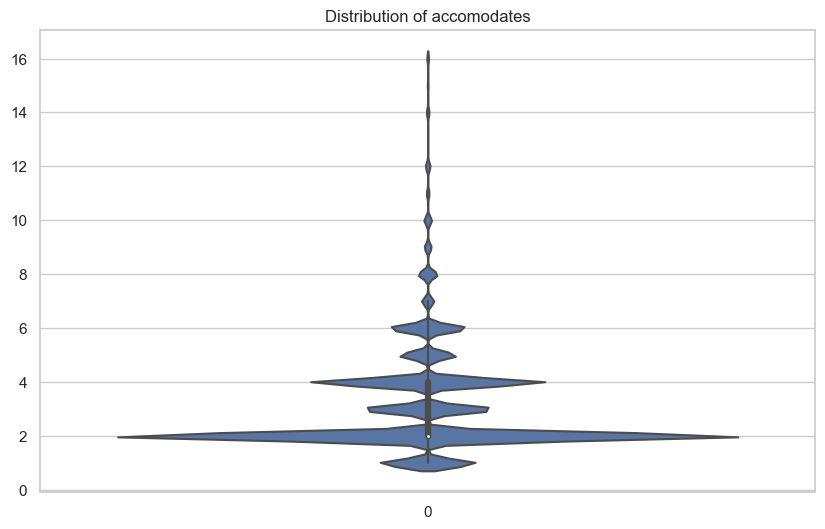

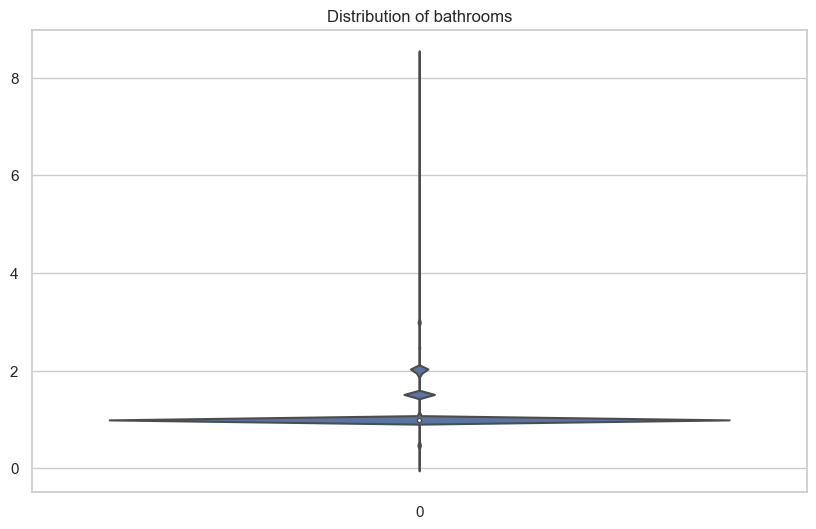

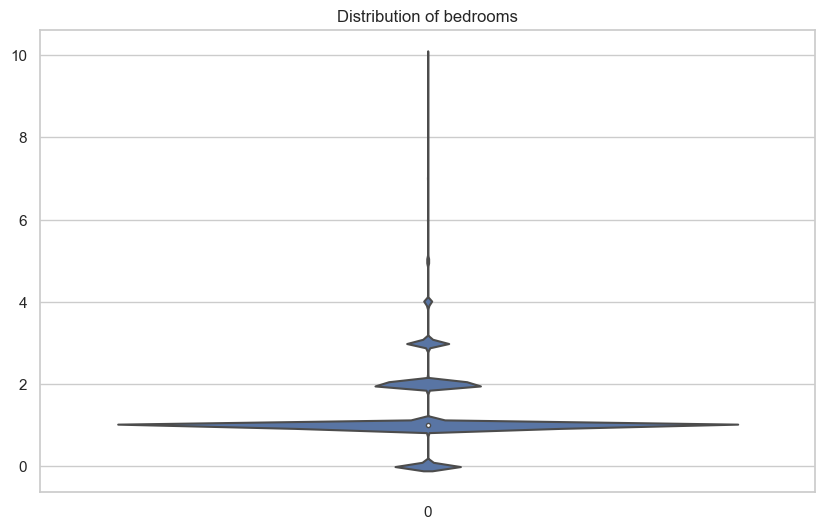

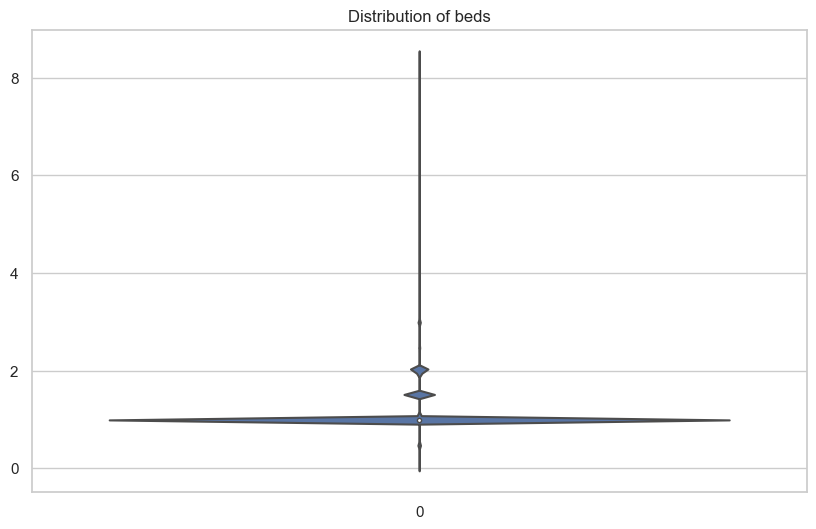

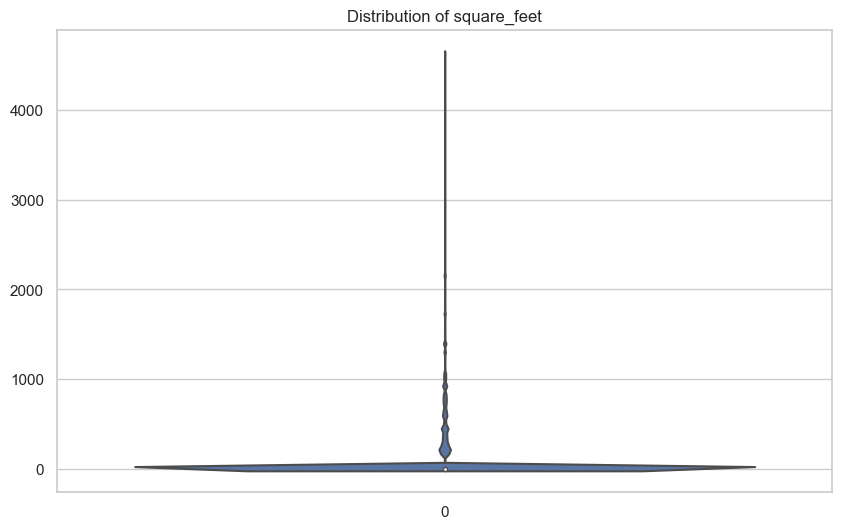

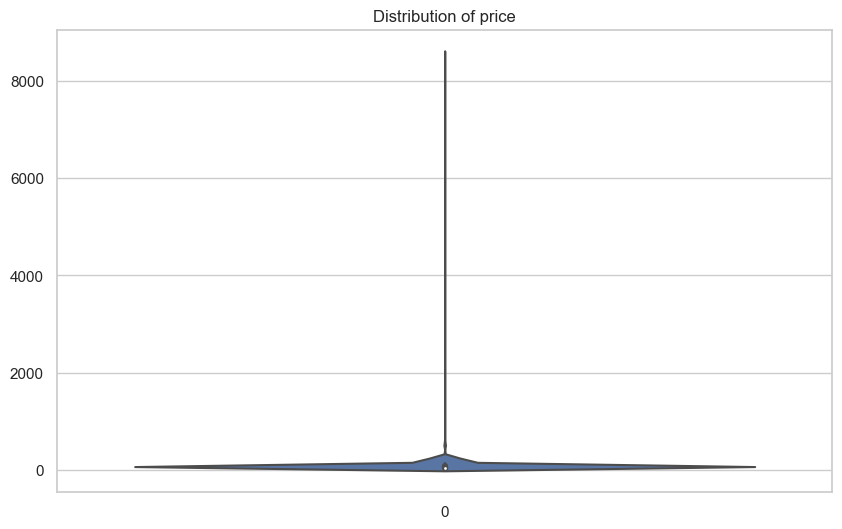

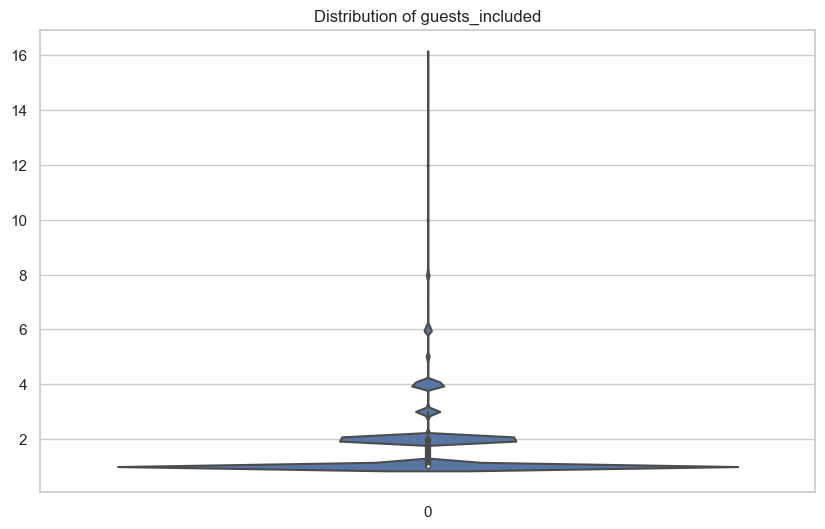

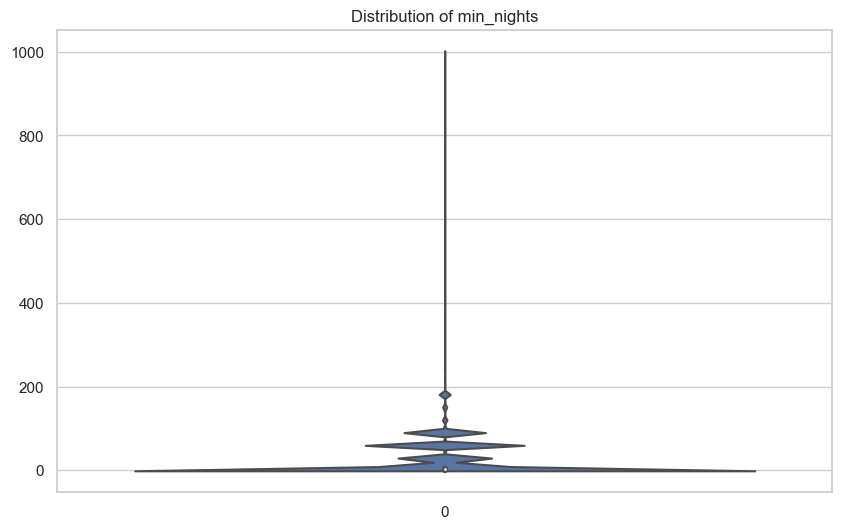

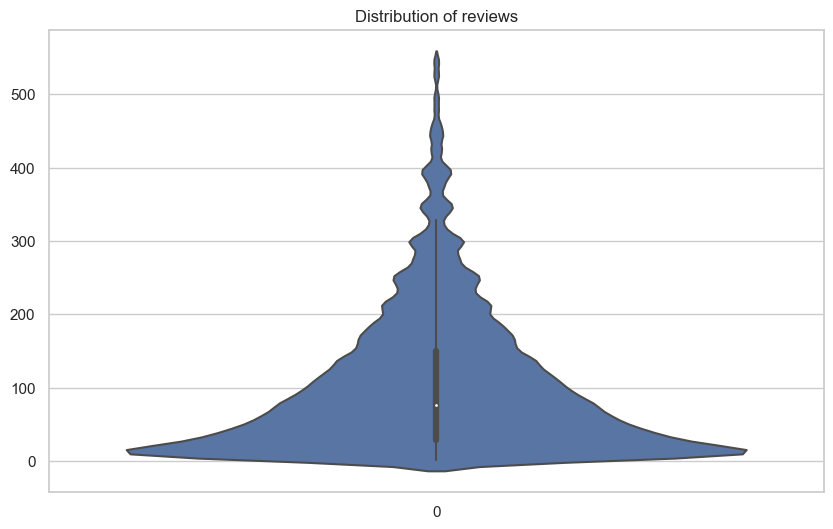

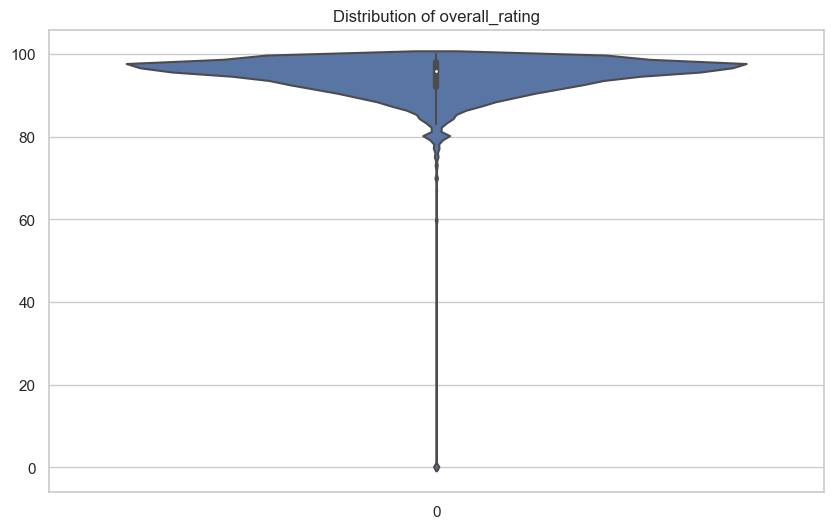

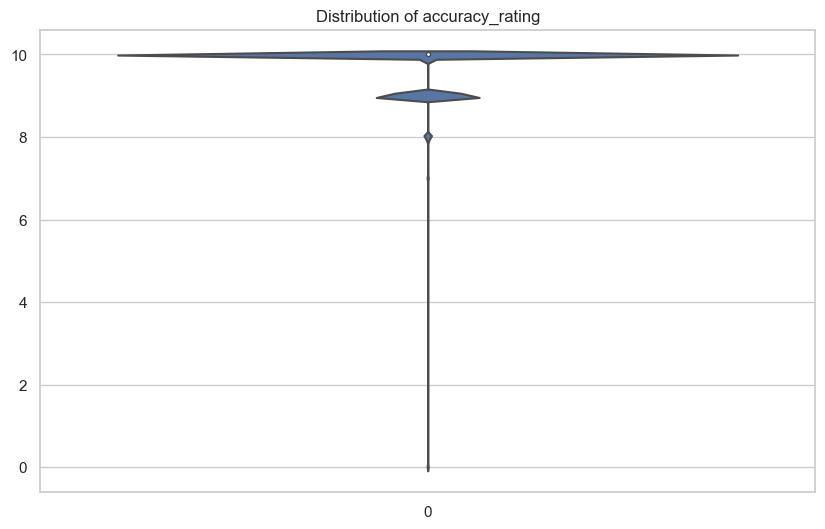

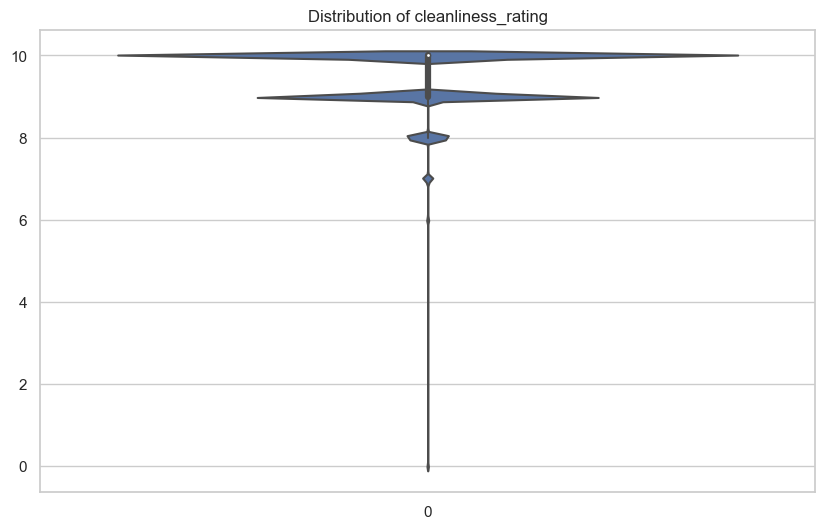

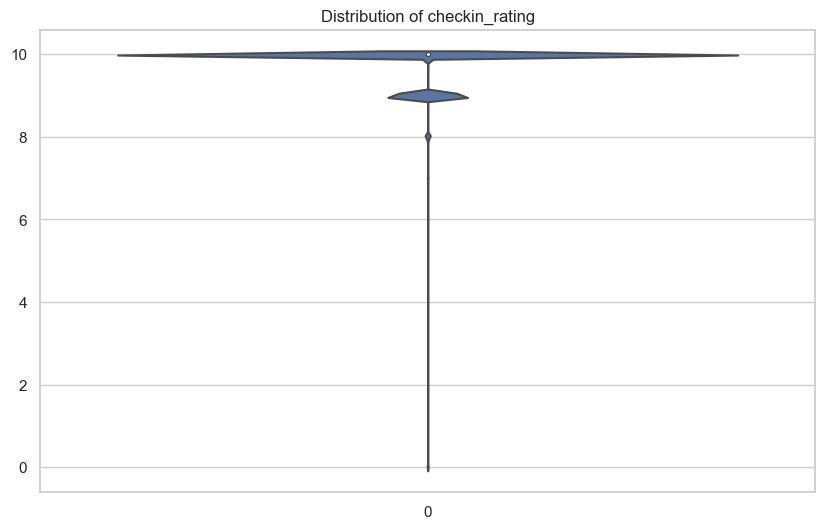

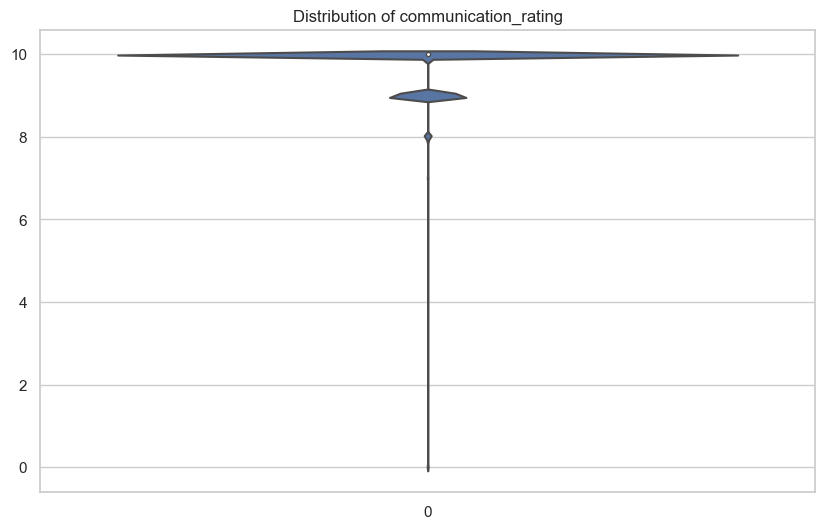

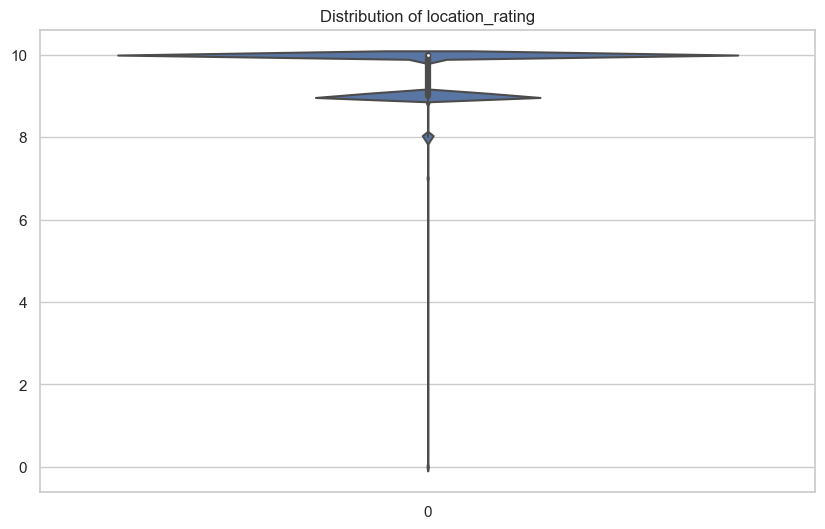

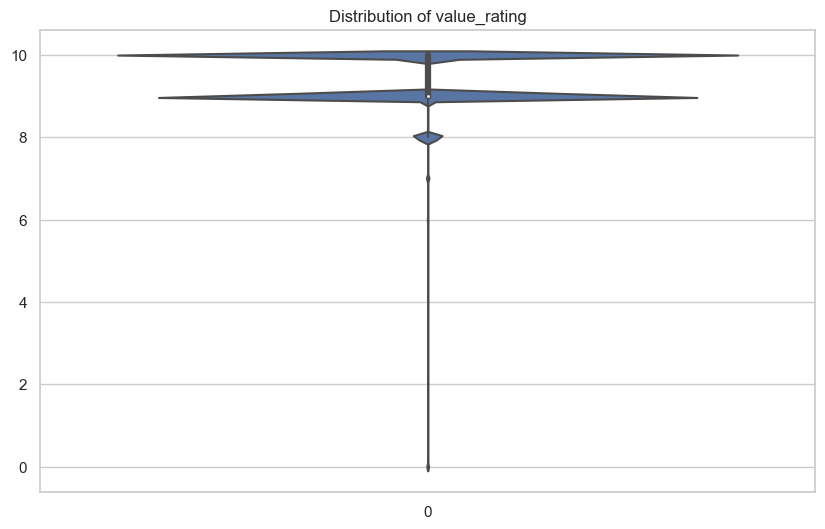

In [10]:
for col in numerical_distribution:
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.violinplot(data=numerical_distribution[col])
    plt.title("Distribution of " + col)
    plt.show()

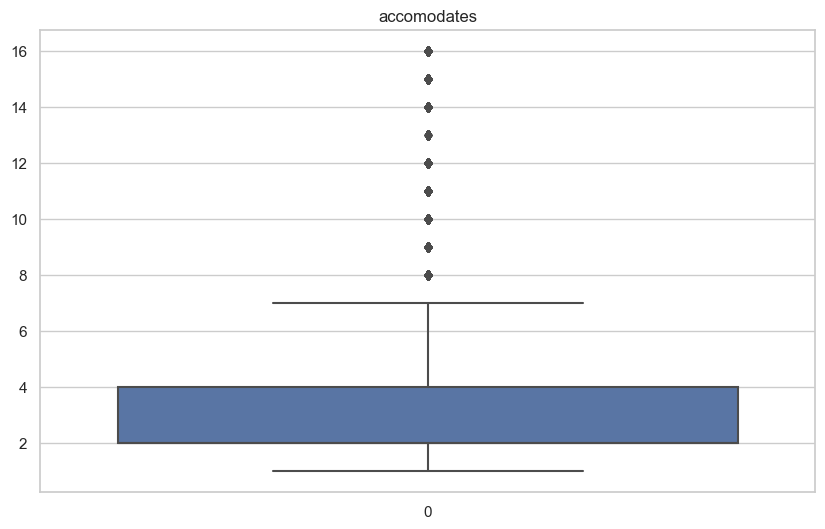

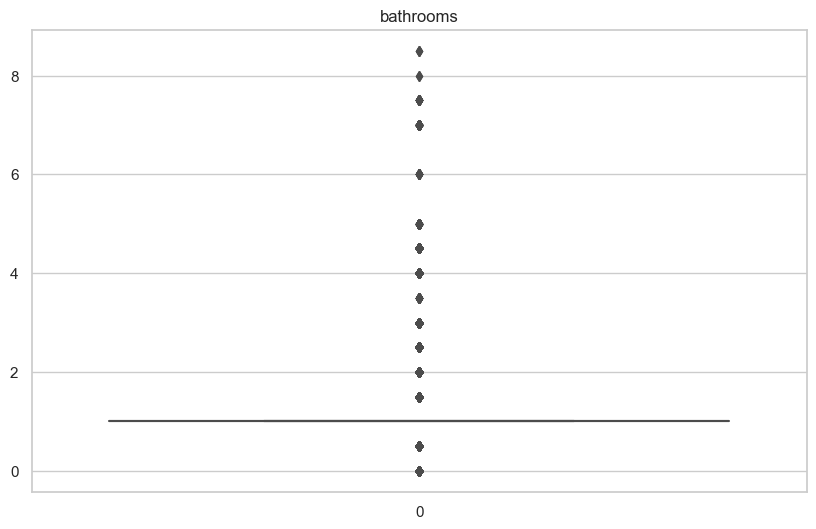

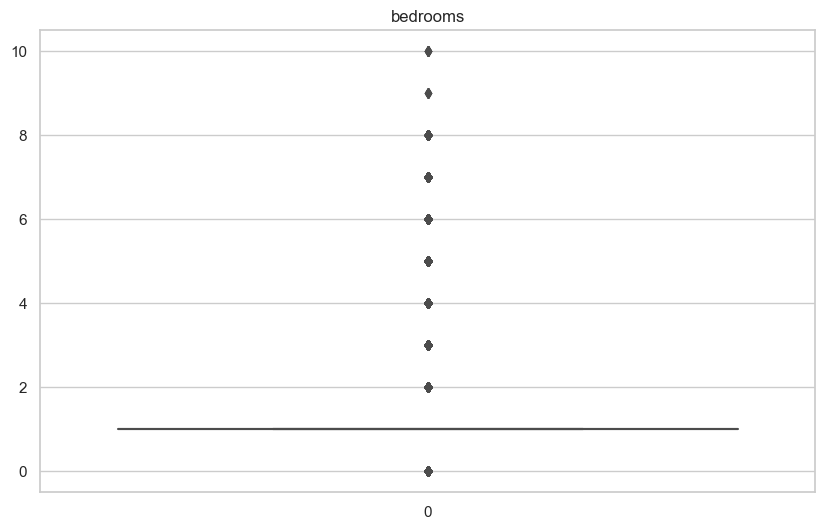

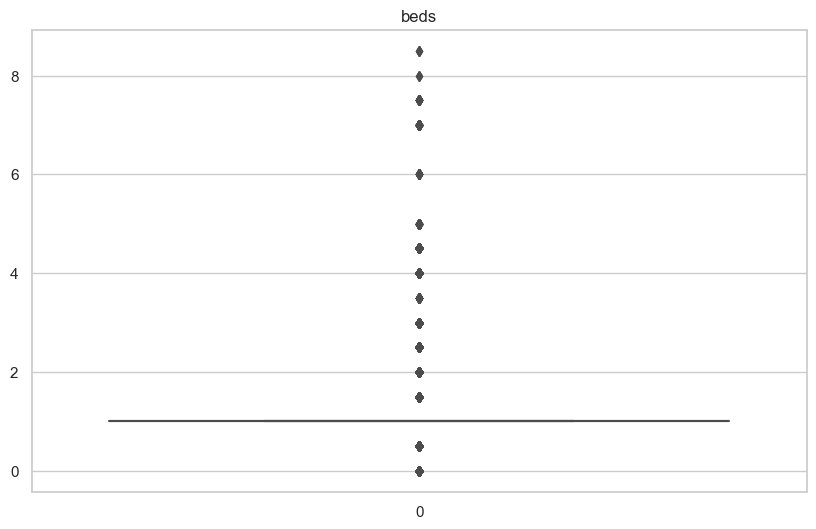

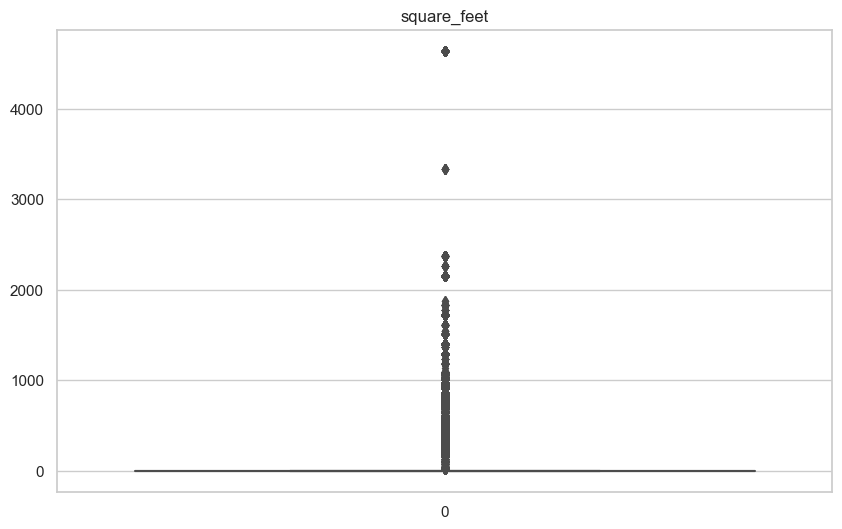

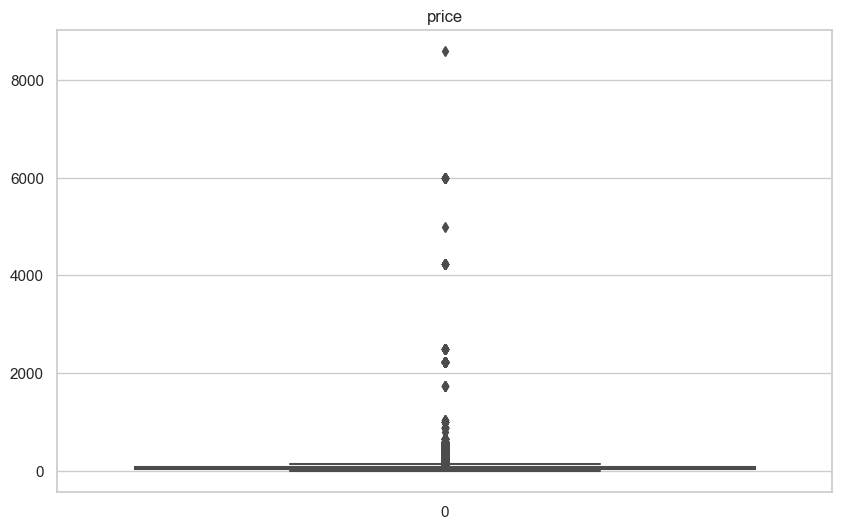

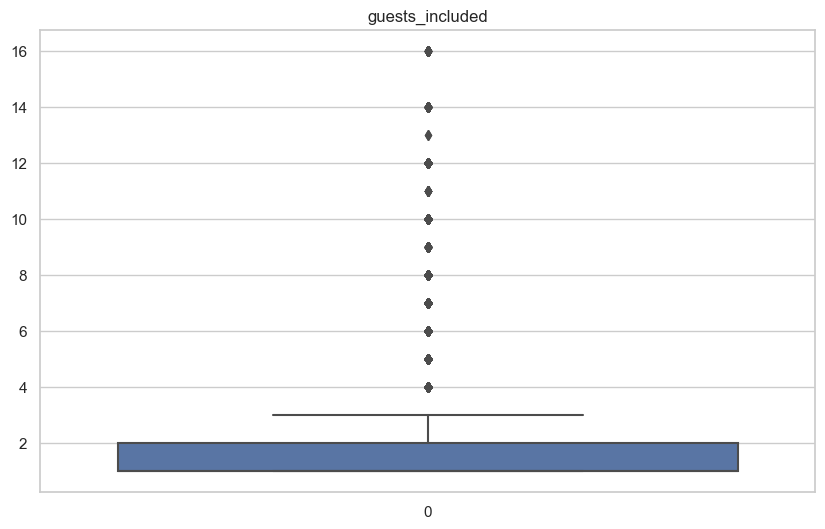

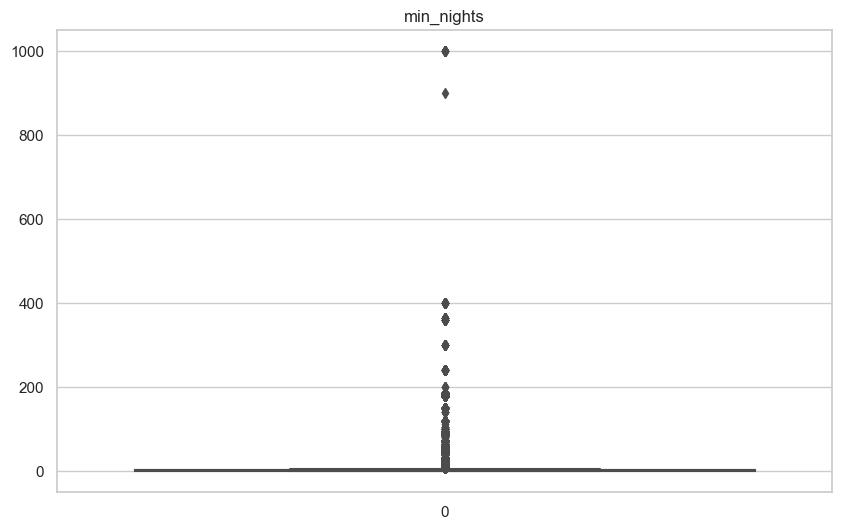

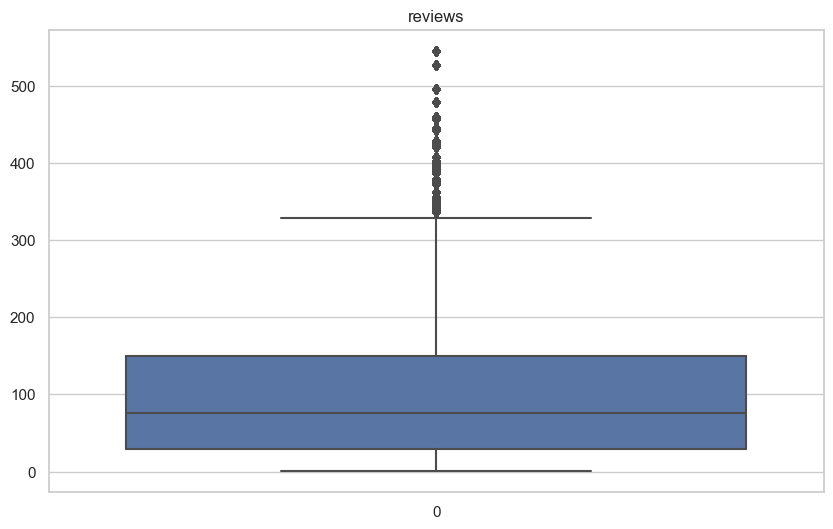

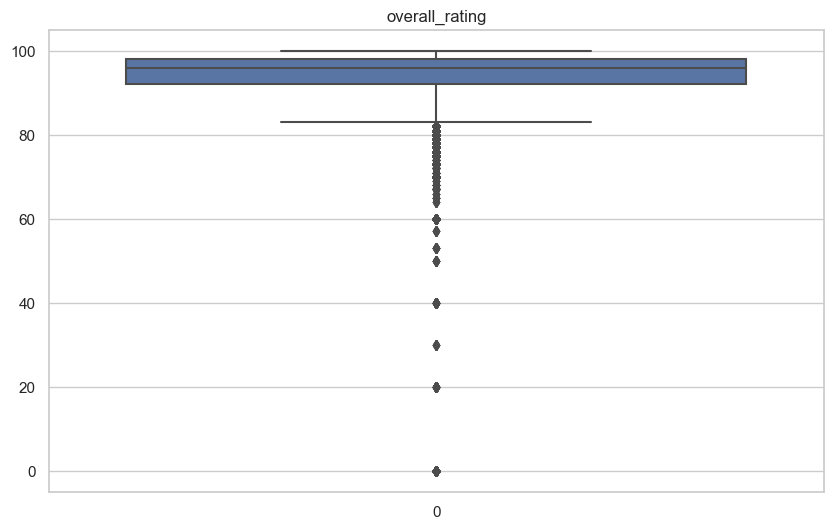

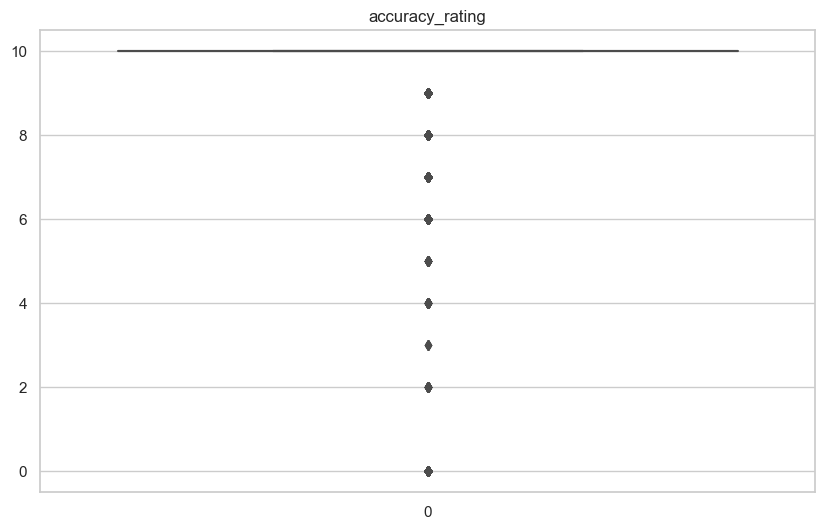

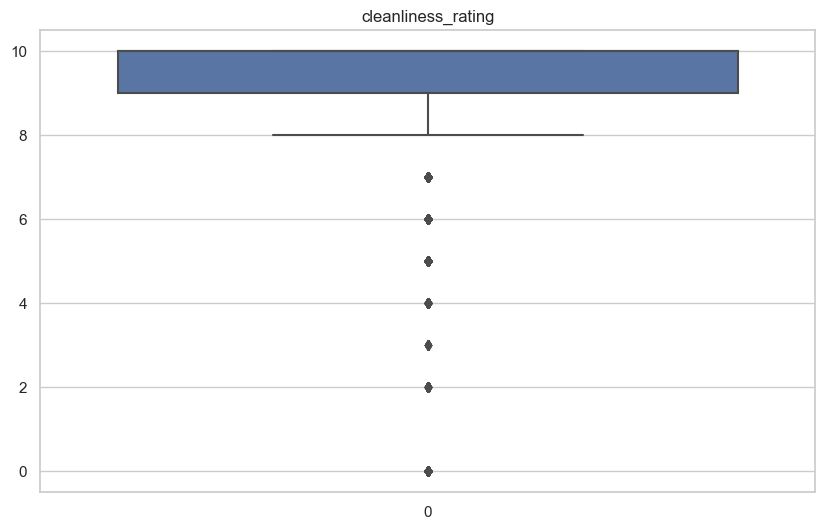

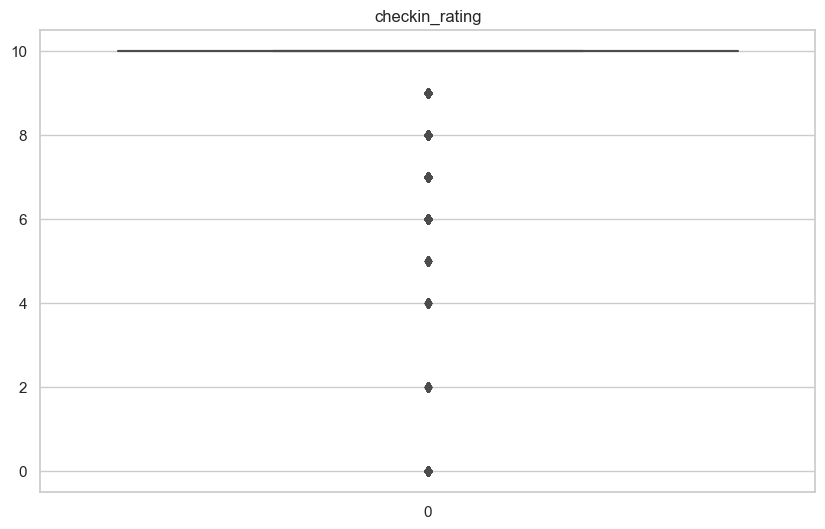

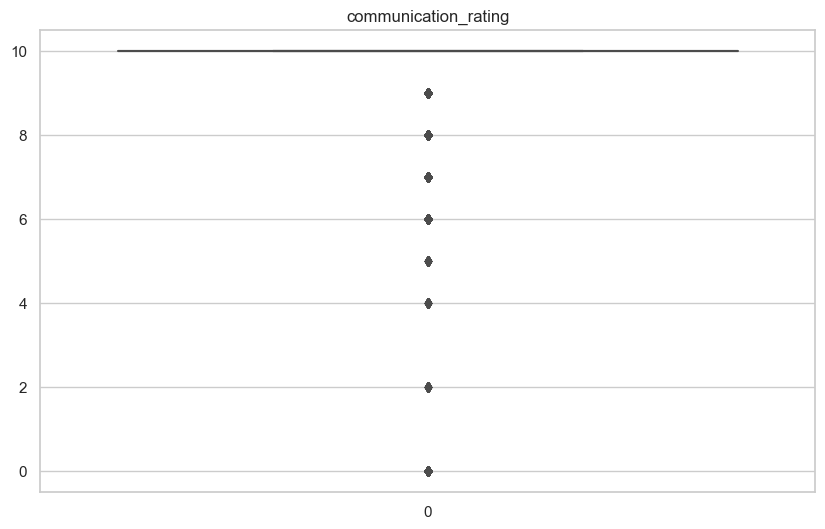

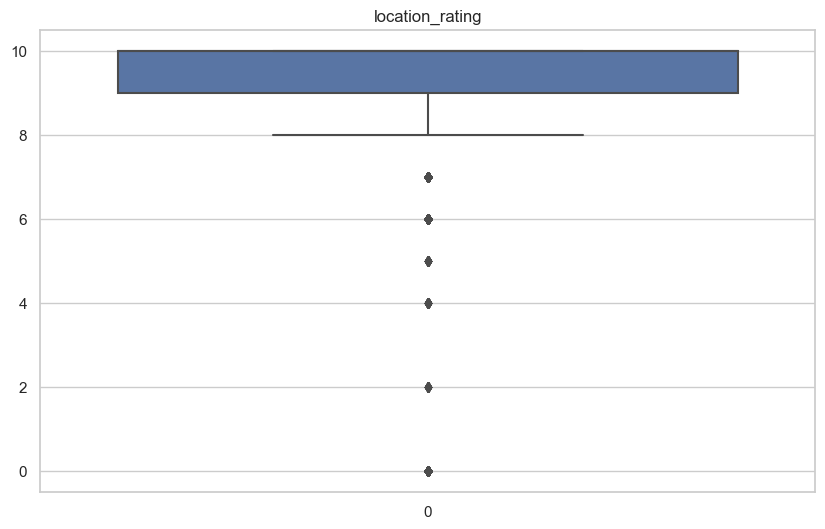

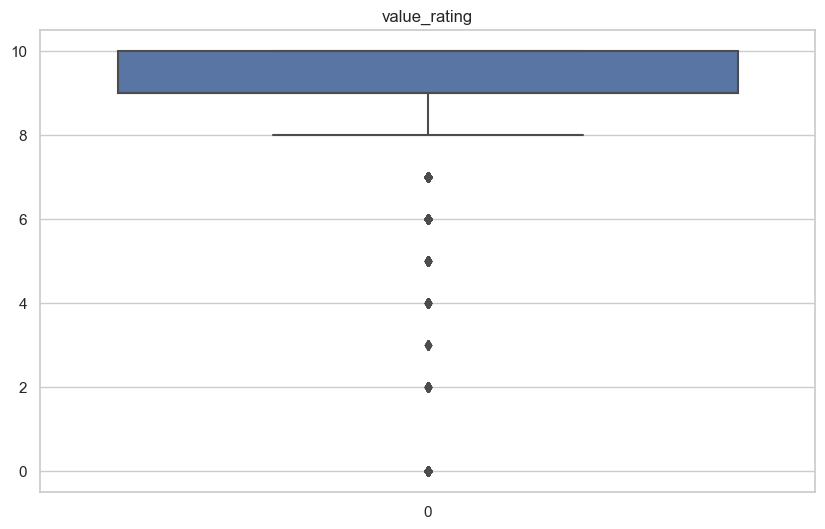

In [11]:
for col in numerical_distribution.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numerical_distribution[col])
    plt.title(col)
    plt.show()

To easen the correlation plot, I am going to exclude ids and other not relevant variables

In [12]:
filtered_numerical = df.drop(columns=['reviewer_id', 'review_id', 'listing_id', 'host_id', 'index', 'latitude', 'longitude', 'min_nights', 'reviews'])

/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_33674/2892621786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = filtered_numerical.corr()


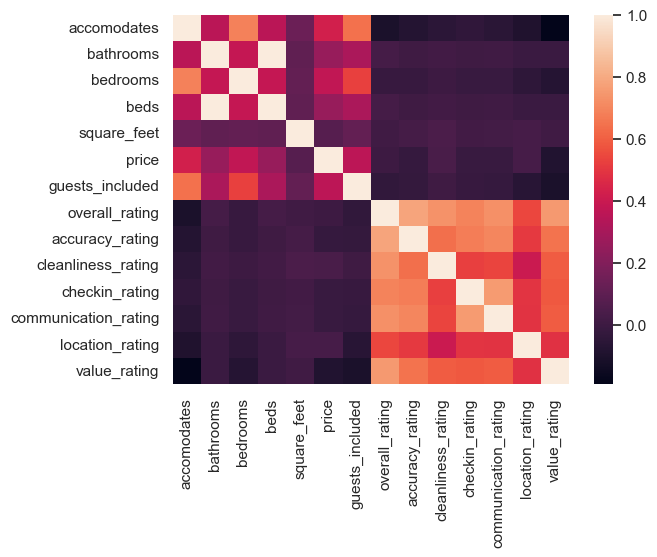

,accomodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,overall_rating,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating
accomodates,1.000000,0.357056,0.685252,0.357056,0.137927,0.424015,0.643742,-0.104793,-0.076087,-0.053994,-0.041753,-0.057129,-0.091016,-0.191684
bathrooms,0.357056,1.000000,0.384957,1.000000,0.105098,0.255314,0.314033,0.024707,0.004875,0.013503,0.005284,0.008766,-0.008456,-0.009539
bedrooms,0.685252,0.384957,1.000000,0.384957,0.114137,0.374573,0.525471,-0.017213,-0.017808,0.001692,-0.010498,-0.010335,-0.046140,-0.072408
beds,0.357056,1.000000,0.384957,1.000000,0.105098,0.255314,0.314033,0.024707,0.004875,0.013503,0.005284,0.008766,-0.008456,-0.009539
square_feet,0.137927,0.105098,0.114137,0.105098,1.000000,0.074829,0.111823,0.011163,0.026032,0.043340,0.017148,0.018421,0.029157,0.012223
price,0.424015,0.255314,0.374573,0.255314,0.074829,1.000000,0.359813,0.001467,-0.019765,0.038433,-0.010645,-0.012514,0.031016,-0.085069
guests_included,0.643742,0.314033,0.525471,0.314033,0.111823,0.359813,1.000000,-0.036511,-0.027466,0.007001,-0.017010,-0.022345,-0.064327,-0.105723
overall_rating,-0.104793,0.024707,-0.017213,0.024707,0.011163,0.001467,-0.036511,1.000000,0.781317,0.732529,0.688455,0.726183,0.540252,0.748819
accuracy_rating,-0.076087,0.004875,-0.017808,0.004875,0.026032,-0.019765,-0.027466,0.781317,1.000000,0.640521,0.677124,0.698362,0.509123,0.650076
cleanliness_rating,-0.053994,0.013503,0.001692,0.013503,0.043340,0.038433,0.007001,0.732529,0.640521,1.000000,0.524806,0.538943,0.403639,0.590521


In [13]:
correlations_matrix = filtered_numerical.corr()
sns.heatmap(correlations_matrix)
plt.show()

correlations_matrix

We can notice that values referring to the property itself are more correlated among each other, so as expected scores are more related to each other. To simplify the graph, I will select only one column for rating "overall score". I will also drop square feet becuase of the great proportion of missing data

In [14]:
filtered_numerical_only_overall_rating = filtered_numerical.drop(columns=['accuracy_rating', 'cleanliness_rating', 'checkin_rating', 'checkin_rating', 'location_rating', 'value_rating', 'communication_rating', 'square_feet'])

/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_33674/76644968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = filtered_numerical_only_overall_rating.corr()


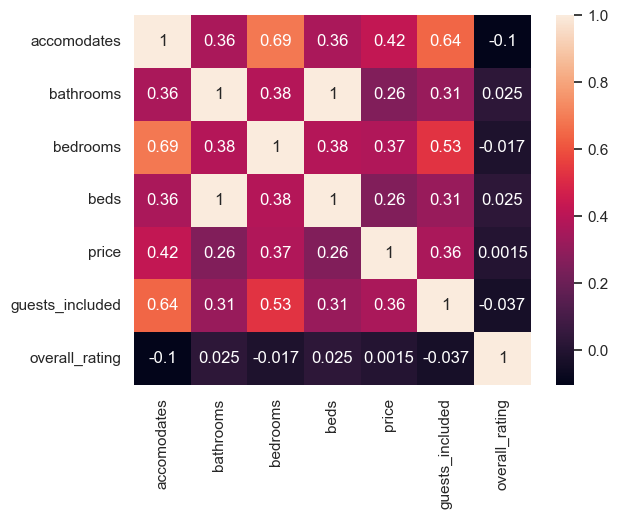

,accomodates,bathrooms,bedrooms,beds,price,guests_included,overall_rating
accomodates,1.000000,0.357056,0.685252,0.357056,0.424015,0.643742,-0.104793
bathrooms,0.357056,1.000000,0.384957,1.000000,0.255314,0.314033,0.024707
bedrooms,0.685252,0.384957,1.000000,0.384957,0.374573,0.525471,-0.017213
beds,0.357056,1.000000,0.384957,1.000000,0.255314,0.314033,0.024707
price,0.424015,0.255314,0.374573,0.255314,1.000000,0.359813,0.001467
guests_included,0.643742,0.314033,0.525471,0.314033,0.359813,1.000000,-0.036511
overall_rating,-0.104793,0.024707,-0.017213,0.024707,0.001467,-0.036511,1.000000


In [15]:
correlations_matrix = filtered_numerical_only_overall_rating.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

correlations_matrix

We can observe that as expected columns that refer to the property itself are highly correlated among each other and with the price. But price and overall rating seem to have no correlation. Price and accomodates the number of the guests are only 0.4 corralated

NOTE: beds and bathrooms have a correlation of 1??

To conclude this part, I want to investigate and visualize the comparison of the different scores distribution

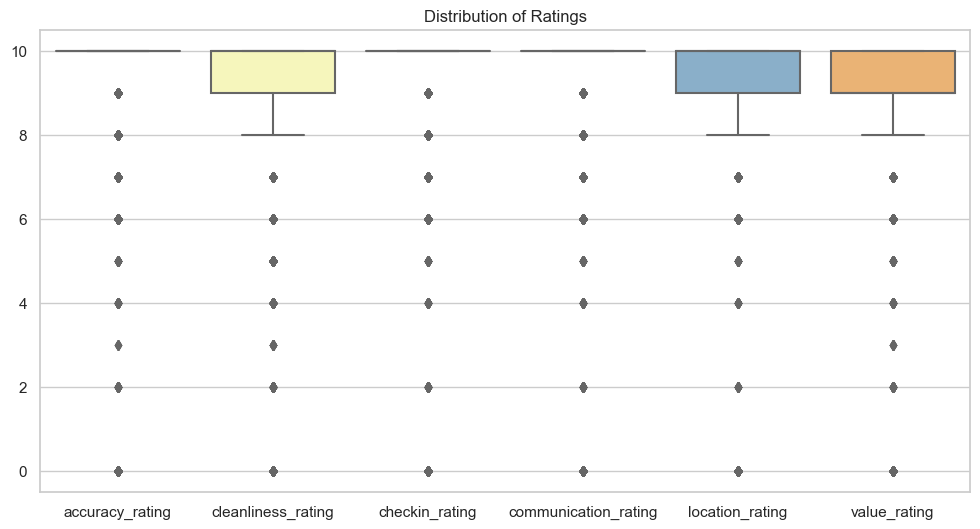

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['accuracy_rating', 'cleanliness_rating', 'checkin_rating',
                   'communication_rating', 'location_rating', 'value_rating']

plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_distribution[columns_to_plot], palette='Set3')
plt.title('Distribution of Ratings')

plt.show()


In [17]:
numerical_distribution['location_rating'].min()

0

In [18]:
for col in columns_to_plot:
    print(col)

accuracy_rating
cleanliness_rating
checkin_rating
communication_rating
location_rating
value_rating


In [19]:
numerical_distribution['accuracy_rating'].describe()

count    452767.000000
mean          9.756243
std           0.590645
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: accuracy_rating, dtype: float64

In [20]:
numerical_distribution['cleanliness_rating'].describe()

count    452767.000000
mean          9.490349
std           0.763476
min           0.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: cleanliness_rating, dtype: float64

In [21]:
numerical_distribution['checkin_rating'].describe()

count    452767.000000
mean          9.792226
std           0.567840
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: checkin_rating, dtype: float64

In [22]:
numerical_distribution['communication_rating'].describe()

count    452767.000000
mean          9.793602
std           0.568150
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: communication_rating, dtype: float64

In [23]:
numerical_distribution['location_rating'].describe()

count    452767.000000
mean          9.625885
std           0.636744
min           0.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: location_rating, dtype: float64

The variation in the rating is relatively low. It is higher in location_rating and in cleanliness_rating. Only these two parameters have a 25% percentile one point less than the max, which is 10. For all the other ratings, we can conclude that at least 3/4 of the rating are 10

In [24]:
categorical = df.select_dtypes(include=['object'])

In [25]:
categorical.columns

Index(['review_date', 'reviewer_name', 'comments', 'listing_url',
       'listing_name', 'host_url', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'is_superhost',
       'neighbourhood', 'neighborhood_group', 'city', 'postal_code',
       'country_code', 'country', 'is_exact_location', 'property_type',
       'room_type', 'first_review', 'last_review', 'instant_bookable',
       'business_travel_ready'],
      dtype='object')

In [31]:
categorical[columns_to_plot].head()

,is_exact_location,property_type,room_type,first_review,last_review,instant_bookable,business_travel_ready
0,t,Apartment,Entire home/apt,2016-01-03,2016-01-03,f,f
1,t,Apartment,Private room,2016-01-03,2017-02-12,f,f
2,t,Apartment,Private room,2016-01-03,2017-02-12,f,f
3,t,Apartment,Private room,2016-01-03,2017-02-12,f,f
4,t,Apartment,Private room,2016-01-03,2017-02-12,f,f


In [32]:
missing_values = categorical[columns_to_plot].isnull().sum()
print(missing_values)

is_exact_location        0
property_type            0
room_type                0
first_review             0
last_review              0
instant_bookable         0
business_travel_ready    0
dtype: int64


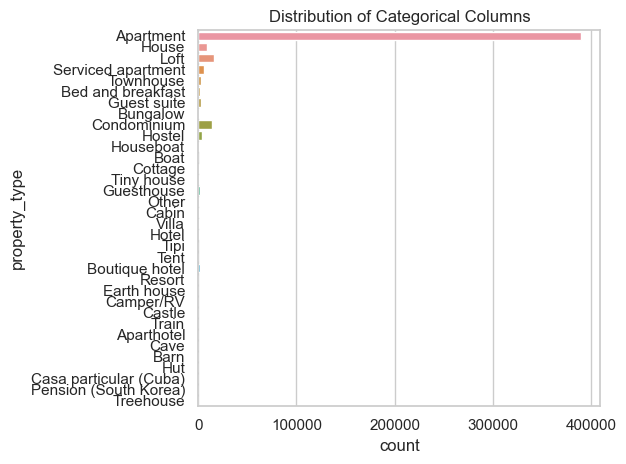

In [37]:
columns_to_plot = ['property_type', 'room_type']

sns.countplot(data=categorical[columns_to_plot], y='property_type')

plt.title('Distribution of Categorical Columns')
plt.xticks()  
plt.tight_layout()  

plt.show()


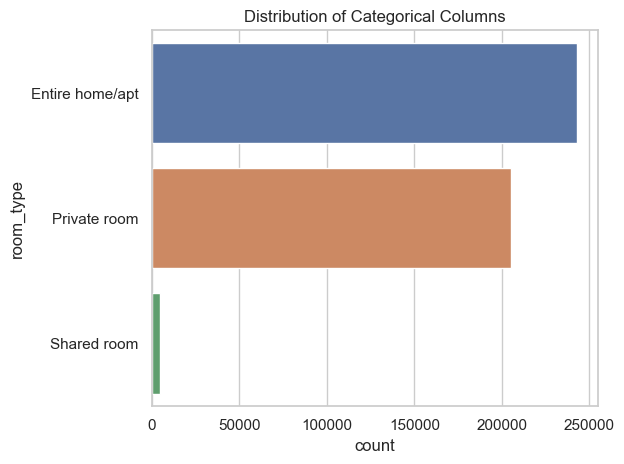

In [38]:
sns.countplot(data=categorical[columns_to_plot], y='room_type')

plt.title('Distribution of Categorical Columns')
plt.xticks()  
plt.tight_layout()  

plt.show()

In [52]:
mean_score_by_room_type = df.groupby(['room_type'])['overall_rating'].mean()

In [53]:
display(mean_score_by_room_type)

room_type
Entire home/apt    94.072432
Private room       94.973211
Shared room        91.500504
Name: overall_rating, dtype: float64

In [54]:
mean_score_by_prop_type = df.groupby(['property_type'])['overall_rating'].mean()

In [56]:
display(mean_score_by_prop_type.sort_values())

property_type
Boat                       84.223404
Aparthotel                 87.000000
Hostel                     89.394546
Tent                       91.000000
Hotel                      91.449324
Resort                     92.372093
Train                      92.666667
Other                      92.792013
Tipi                       93.000000
Casa particular (Cuba)     93.000000
Castle                     93.098039
Tiny house                 93.260274
Bed and breakfast          93.599318
Guest suite                94.197813
Serviced apartment         94.306897
Apartment                  94.408160
Condominium                94.966910
Hut                        95.000000
Guesthouse                 95.052408
Loft                       95.314677
Cottage                    95.666667
House                      95.763593
Townhouse                  96.370956
Cabin                      96.529032
Boutique hotel             96.588417
Camper/RV                  96.782609
Houseboat               